In [1]:
import sys
sys.path.append("..")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

#import ivp scipy 
from scipy.integrate import solve_ivp
from DE_Library.diferential_equation_functionals import *

In [3]:
#1rst order ODEs list:
#1. Paper: df/dx + lamb * np.exp(-lamb * x * k) * np.sin(lamb * x) + lamb * k * f = 0, f(0) = 1
#2. Log ODE: df/dx - lamb * np.exp(f * k) = 0, f(0.01) = np.log(0.01)
#3. Polynomial with exp: 2*f+4*cos(x)-8*sin(x) - df/dx = 0, f(0) = 3
#4. Paper decay QNN: df/dx + lamb * f*(k + tan(lamb*x)) = 0, f(0) = 1
#5. Simple test QNN: df/dx + sin(x) = 0, f(0) = 1
#6. Paper nontrivial dynamics: dfdx -4*f + 6*f**2 - np.sin(50*x)-f*np.cos(25*x) + 0.5 = 0, f(0) = 0.75
#7. Bernoulli DE: dfdx - (-2*x + f)**2 - 7 = 0, f(0) = 0


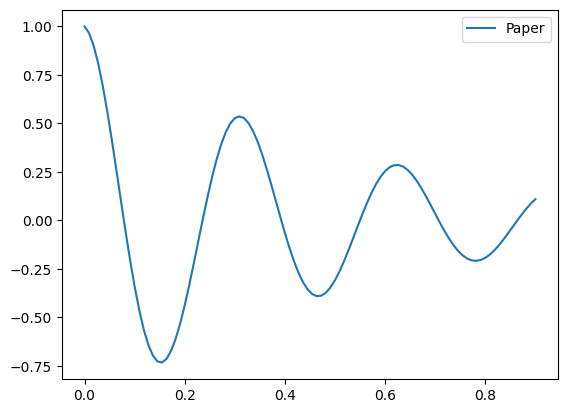

In [4]:
f_initial = 1
x_line = np.linspace(0, 0.9, 100)
true_sol = odeint(mapping_of_derivatives_of_loss_functions["paper"], f_initial, x_line[:])
plt.plot(x_line, true_sol, label="Paper")
plt.legend()

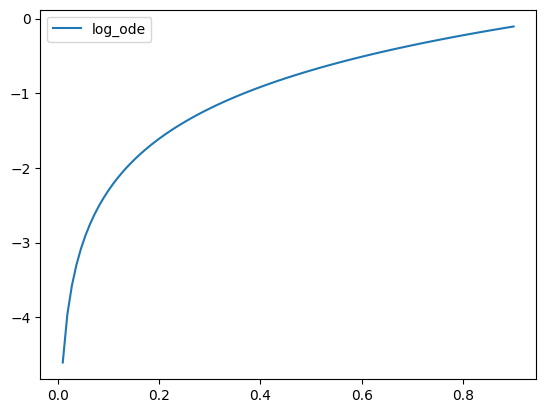

In [5]:
f_initial = np.log(0.01)
x_line = np.linspace(0.01, 0.9, 100)
name_str = "log_ode"
true_sol = odeint(mapping_of_derivatives_of_loss_functions[name_str], f_initial, x_line[:])
plt.plot(x_line, true_sol, label=name_str)
plt.legend()

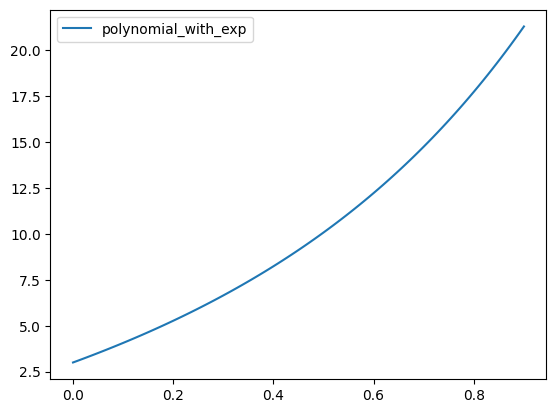

In [6]:
f_initial = 3
x_line = np.linspace(0, 0.9, 100)
name_str = "polynomial_with_exp"
true_sol = odeint(mapping_of_derivatives_of_loss_functions[name_str], f_initial, x_line[:])
plt.plot(x_line, true_sol, label=name_str)
plt.legend()

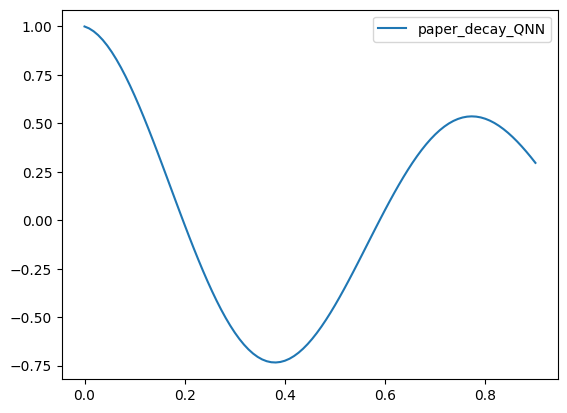

In [7]:
f_initial = 1
x_line = np.linspace(0, 0.9, 100)
name_str = "paper_decay_QNN"
true_sol = odeint(mapping_of_derivatives_of_loss_functions[name_str], f_initial, x_line[:])
plt.plot(x_line, true_sol, label=name_str)
plt.legend()

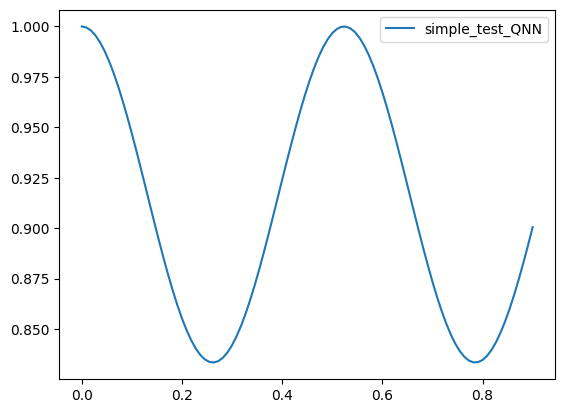

In [8]:
f_initial = 1
x_line = np.linspace(0, 0.9, 100)
name_str = "simple_test_QNN"
true_sol = odeint(mapping_of_derivatives_of_loss_functions[name_str], f_initial, x_line[:])
plt.plot(x_line, true_sol, label=name_str)
plt.legend()

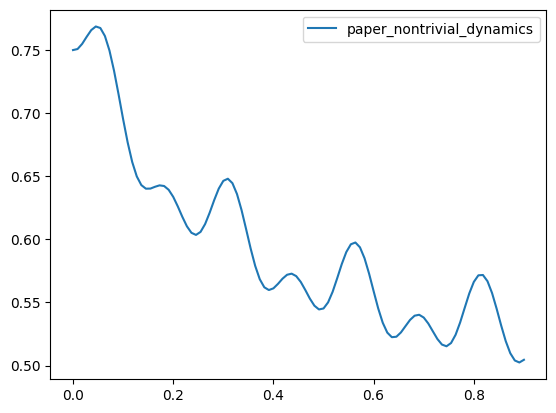

In [9]:
f_initial = 0.75
x_line = np.linspace(0, 0.9, 100)
name_str = "paper_nontrivial_dynamics"
true_sol = odeint(mapping_of_derivatives_of_loss_functions[name_str], f_initial, x_line[:])
plt.plot(x_line, true_sol, label=name_str)
plt.legend()

In [10]:

def loss_arbitrary_ode(f_alpha_tensor):
    """
    initial condition: f(0) = 0
    """
    x, f, dfdx, dfdxdx = f_alpha_tensor
    return -f + x**3 + x**2 + np.sin(f*30) -dfdx

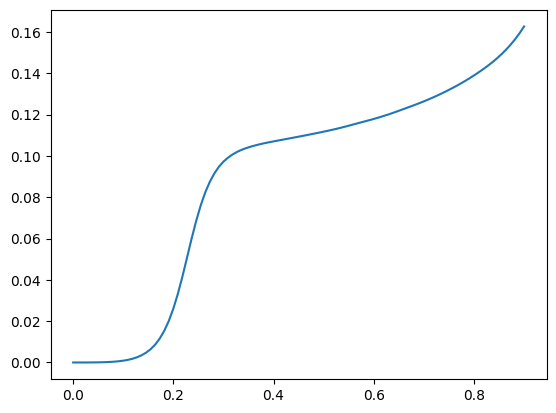

In [11]:
from scipy.integrate import solve_ivp

def loss_bernoulli_DE(x, f):
    dfdx = (-2 * x + f)**2 + 7
    return dfdx

def loss_to_ivp_loss(loss_f):
    def ivp_loss(x, f):
        dfdx = loss_f([x, f, 0, 0])
        return dfdx
    return ivp_loss

# Initial condition
y0 = [0]

# Define the range of x values
x_span = (0, 0.9)
x_eval = np.linspace(x_span[0], x_span[1], 100)

# Solve the ODE using solve_ivp
sol = solve_ivp(loss_to_ivp_loss(loss_arbitrary_ode), x_span, y0, t_eval=x_eval, method='RK45')

# Plot the solution
plt.plot(sol.t, sol.y[0], label='Numerical solution')


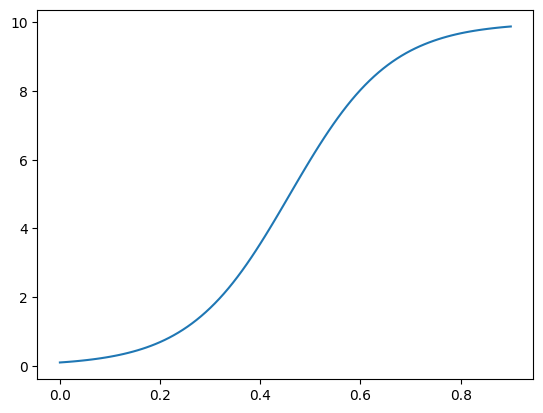

In [100]:
from scipy.integrate import solve_ivp

a, k = 10, 10

def loss_arbitrary_ode(x, f):
    dfdx = k/a*f*(a -f)
    return dfdx

# Initial condition
y0 = [0.1]

# Define the range of x values
x_span = (0, 0.9)
x_eval = np.linspace(x_span[0], x_span[1], 100)

# Solve the ODE using solve_ivp
sol = solve_ivp(loss_arbitrary_ode, x_span, y0, t_eval=x_eval, method='RK45')

# Plot the solution
plt.plot(sol.t, sol.y[0], label='Numerical solution')

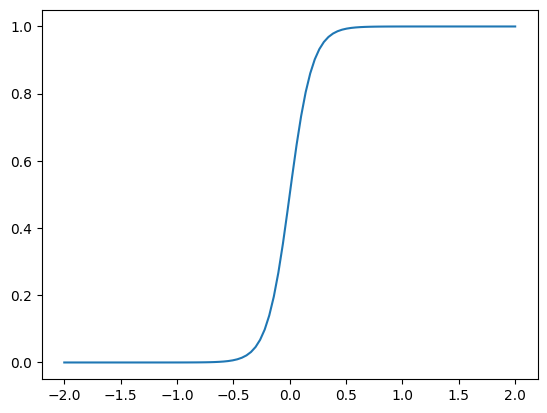

In [52]:
#plot the logistic equation
x = np.linspace(-2, 2, 100)
plt.plot(x, 1/(1+np.exp(-10*x)), label='Logistic function')
